# Exploratory Data Analysis (EDA) for Data Science Salaries - Glassdoor Dataset 

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

## Importing cleaned Dataset

In [2]:
df = pd.read_csv('Data_Science_Salaries_cleaned.csv')
df.head()

,Job_Title,Salary_Estimate,Job_Description,Rating,Company_Name,Location,Headquarter,Size,Founded,Type_of_ownership,...,Job_state,same_state,age_of_company,Python,R-studio,spark,Excel,AWS,Seniority_Level,Job_Title_Simplified
0,Data Scientist,53-91,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,NM,0,50,1,0,0,1,0,na,data scientist
1,Healthcare Data Scientist,63-112,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,MD,0,39,1,0,0,0,0,na,data scientist
2,Data Scientist,80-90,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,FL,1,13,1,0,1,1,0,na,data scientist
3,Data Scientist,56-97,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,WA,1,58,1,0,0,0,0,na,data scientist
4,Data Scientist,86-143,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,NY,1,25,1,0,0,1,0,na,data scientist


In [3]:
df.columns

Index(['Job_Title', 'Salary_Estimate', 'Job_Description', 'Rating',
       'Company_Name', 'Location', 'Headquarter', 'Size', 'Founded',
       'Type_of_ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'seniority', 'Job_Title_simplified', 'PerHour',
       'employer_Provided_Salary', 'min_salary', 'max_salary',
       'average_salary', 'Job_state', 'same_state', 'age_of_company', 'Python',
       'R-studio', 'spark', 'Excel', 'AWS', 'Seniority_Level',
       'Job_Title_Simplified'],
      dtype='object')

In [4]:
df['Job_Title_Simplified'].value_counts()

Job_Title_Simplified
data scientist      279
na                  184
data engineer       119
analyst             102
manager              22
machine learning     22
director             14
Name: count, dtype: int64

In [5]:
df['Seniority_Level'].value_counts()

Seniority_Level
na           519
senior       173
principal     25
lead          22
junior         3
Name: count, dtype: int64

#### FIx state 'Los Angeles'

In [6]:
df['Job_state'].value_counts()

Job_state
CA             151
MA             103
NY              72
VA              41
IL              40
MD              35
PA              33
TX              28
WA              21
NC              21
NJ              17
FL              16
OH              14
TN              13
DC              11
CO              11
WI              10
IN              10
UT              10
AZ               9
MO               9
AL               8
GA               6
KY               6
DE               6
MI               6
CT               5
IA               5
LA               4
OR               4
NE               4
NM               3
KS               3
ID               2
MN               2
Los Angeles      1
RI               1
SC               1
Name: count, dtype: int64

In [7]:
df[df['Job_state'] == 'Los Angeles']

,Job_Title,Salary_Estimate,Job_Description,Rating,Company_Name,Location,Headquarter,Size,Founded,Type_of_ownership,...,Job_state,same_state,age_of_company,Python,R-studio,spark,Excel,AWS,Seniority_Level,Job_Title_Simplified
126,Data Scientist,82-133,"For more than 50 years, Accuride International...",3.6,Accuride International,"Santa Fe Springs, Los Angeles, CA","Santa Fe Springs, CA",1001 to 5000 employees,1966,Company - Private,...,Los Angeles,0,57,0,0,0,1,0,na,data scientist


In [8]:
df['Job_state'].loc[126].strip().lower()

'los angeles'

In [9]:
df['Job_state'] = df['Job_state'].apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')

In [10]:
df['Job_state'].value_counts()

Job_state
CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
NC     21
WA     21
NJ     17
FL     16
OH     14
TN     13
DC     11
CO     11
WI     10
UT     10
IN     10
AZ      9
MO      9
AL      8
GA      6
DE      6
KY      6
MI      6
CT      5
IA      5
LA      4
OR      4
NE      4
NM      3
KS      3
ID      2
MN      2
RI      1
SC      1
Name: count, dtype: int64

#### Job Description Length

In [11]:
df['Job_Description_Length'] = df['Job_Description'].apply(len)

In [12]:
df['Job_Description_Length']

0      2536
1      4783
2      3461
3      3883
4      2728
       ... 
737    6162
738    6130
739    3078
740    1642
741    3673
Name: Job_Description_Length, Length: 742, dtype: int64

#### Competitor Count

In [13]:
df['Competitors'].value_counts()

Competitors
-1                                                                                              460
Novartis, Baxter, Pfizer                                                                         14
Oak Ridge National Laboratory, National Renewable Energy Lab, Los Alamos National Laboratory     12
Travelers, Allstate, State Farm                                                                  10
Roche, GlaxoSmithKline, Novartis                                                                  9
                                                                                               ... 
BrowserStack, Selenium Master, Perfecto Mobile                                                    1
Boeing, Northrop Grumman, Raytheon                                                                1
Unilever, Procter & Gamble, Henkel                                                                1
TASC, Vencore, Booz Allen Hamilton                                                      

In [14]:
df['Number_of_Competitors'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != -1 else 0)
df['Number_of_Competitors'].value_counts()

Number_of_Competitors
1    472
3    228
2     41
4      1
Name: count, dtype: int64

#### hourly wage (min & max salary) to an annual wage

- 8hrs/day * 5 days/week * 50 working weeks = 2000

In [15]:
# convert min salary associated with perhour ==1 to an annual salary
df['min_salary'][df['PerHour'] == 1] = df['min_salary'][df['PerHour'] == 1]*2
df['max_salary'][df['PerHour'] == 1] = df['max_salary'][df['PerHour'] == 1]*2
df['average_salary'][df['PerHour'] == 1] = df['average_salary'][df['PerHour'] == 1]*2

C:\Users\Amr Ahmed\AppData\Local\Temp\ipykernel_10064\4161430544.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['min_salary'][df['PerHour'] == 1] = df['min_salary'][df['PerHour'] == 1]*2
C:\Users\Amr Ahmed\AppData\Local\Temp\ipykernel_10064\4161430544.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['max_salary'][df['PerHour'] == 1] = df['max_salary'][df['PerHour'] == 1]*2
C:\Users\Amr Ahmed\AppData\Local\Temp\ipykernel_10064\4161430544.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

In [16]:
df[['PerHour','min_salary', 'max_salary', 'average_salary']].loc[df['PerHour'] == 1]

,PerHour,min_salary,max_salary,average_salary
165,1,34,48,41.0
177,1,42,68,55.0
197,1,36,50,43.0
202,1,42,68,55.0
210,1,30,50,40.0
246,1,34,48,41.0
271,1,42,68,55.0
337,1,36,50,43.0
345,1,48,78,63.0
357,1,42,68,55.0


---------------------

In [17]:
df.describe()

,Rating,Founded,PerHour,employer_Provided_Salary,min_salary,max_salary,average_salary,same_state,age_of_company,Python,R-studio,spark,Excel,AWS,Job_Description_Length,Number_of_Competitors
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,101.434636,0.557951,49.389488,0.528302,0.002695,0.225067,0.522911,0.237197,3869.545822,1.673854
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,37.546122,0.496965,53.962906,0.499535,0.051882,0.417908,0.499812,0.425651,1521.495868,0.918451
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,15.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,1.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,1.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,27.000000,1.000000,0.000000,0.000000,1.000000,0.000000,3731.000000,1.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,62.000000,1.000000,0.000000,0.000000,1.000000,0.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,279.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


In [18]:
df.describe(include = 'object').T

,count,unique,top,freq
Job_Title,742,264,Data Scientist,131
Salary_Estimate,742,416,49-113,6
Job_Description,742,463,Description\nMedical Laboratory Scientist - Te...,4
Company_Name,742,343,MassMutual,14
Location,742,200,"New York, NY",55
Headquarter,742,198,"New York, NY",52
Size,742,9,1001 to 5000 employees,150
Type_of_ownership,742,11,Company - Private,410
Industry,742,60,Biotech & Pharmaceuticals,112
Sector,742,25,Information Technology,180


In [19]:
df.head(5)

,Job_Title,Salary_Estimate,Job_Description,Rating,Company_Name,Location,Headquarter,Size,Founded,Type_of_ownership,...,age_of_company,Python,R-studio,spark,Excel,AWS,Seniority_Level,Job_Title_Simplified,Job_Description_Length,Number_of_Competitors
0,Data Scientist,53-91,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,50,1,0,0,1,0,na,data scientist,2536,1
1,Healthcare Data Scientist,63-112,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,39,1,0,0,0,0,na,data scientist,4783,1
2,Data Scientist,80-90,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,13,1,0,1,1,0,na,data scientist,3461,1
3,Data Scientist,56-97,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,58,1,0,0,0,0,na,data scientist,3883,3
4,Data Scientist,86-143,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,25,1,0,0,1,0,na,data scientist,2728,3


In [20]:
numerical_columns = ['Rating', 'min_salary', 'max_salary', 'average_salary', 'age_of_company' ,'Job_Description_Length', 'Number_of_Competitors']
categorical_columns = ['Job_Title_Simplified', 'Location','Headquarter', 'Size', 'Type_of_ownership', 'Industry', 'Sector', 'Revenue', 'Job_state', 'spark', 'R-studio', 'Python', 'Excel', 'AWS', 'Seniority_Level']

In [21]:
for column in numerical_columns:
    df[column] = df[column].astype('float')
    
for column in categorical_columns:
    df[column] = df[column].astype('category')

## EDA - Numerical Variables

#### Histograms

array([[<Axes: title={'center': 'Rating'}>,
        <Axes: title={'center': 'min_salary'}>,
        <Axes: title={'center': 'max_salary'}>,
        <Axes: title={'center': 'average_salary'}>],
       [<Axes: title={'center': 'age_of_company'}>,
        <Axes: title={'center': 'Job_Description_Length'}>,
        <Axes: title={'center': 'Number_of_Competitors'}>, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

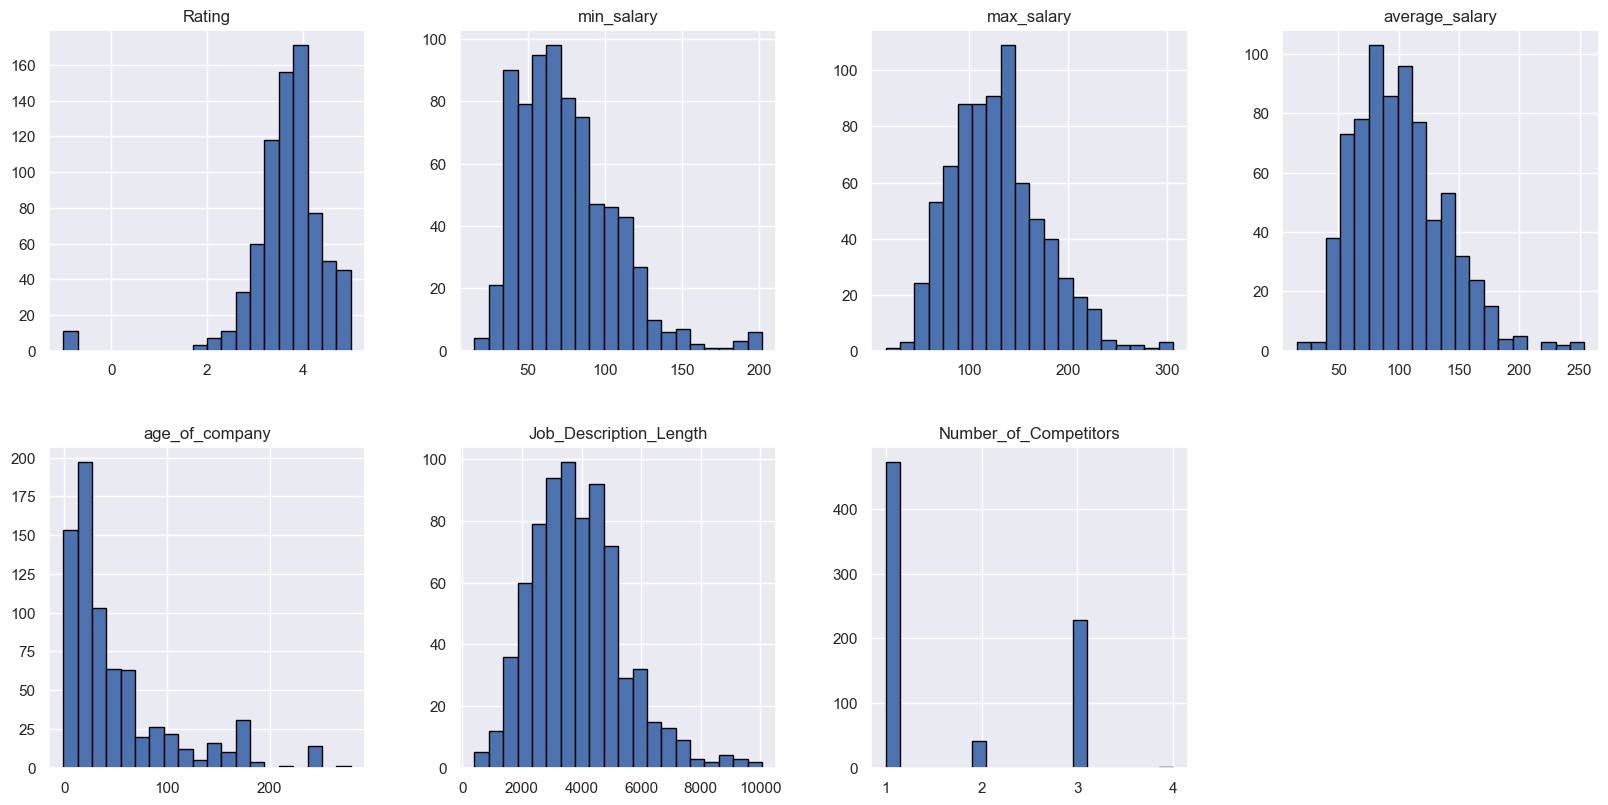

In [22]:
df[numerical_columns].hist(bins = 20, figsize = (20,15), layout = (3,4), edgecolor = 'black')

#### Boxplot

<Axes: >

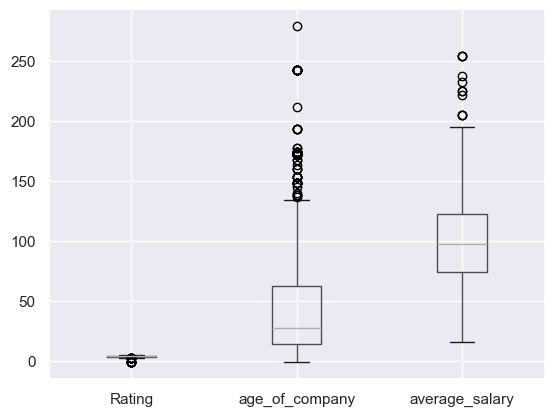

In [23]:
df.boxplot(column = ['Rating','age_of_company', 'average_salary'])

<Axes: >

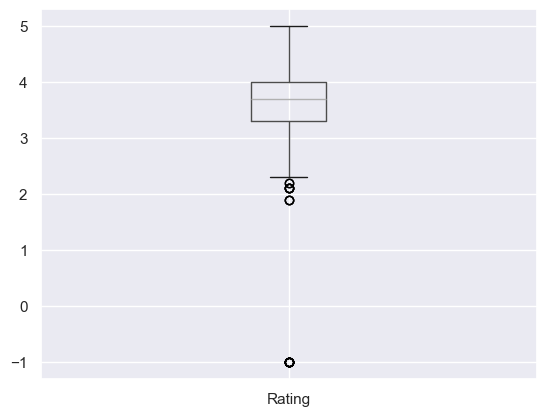

In [24]:
df.boxplot(column = ['Rating'])

#### Pairplot

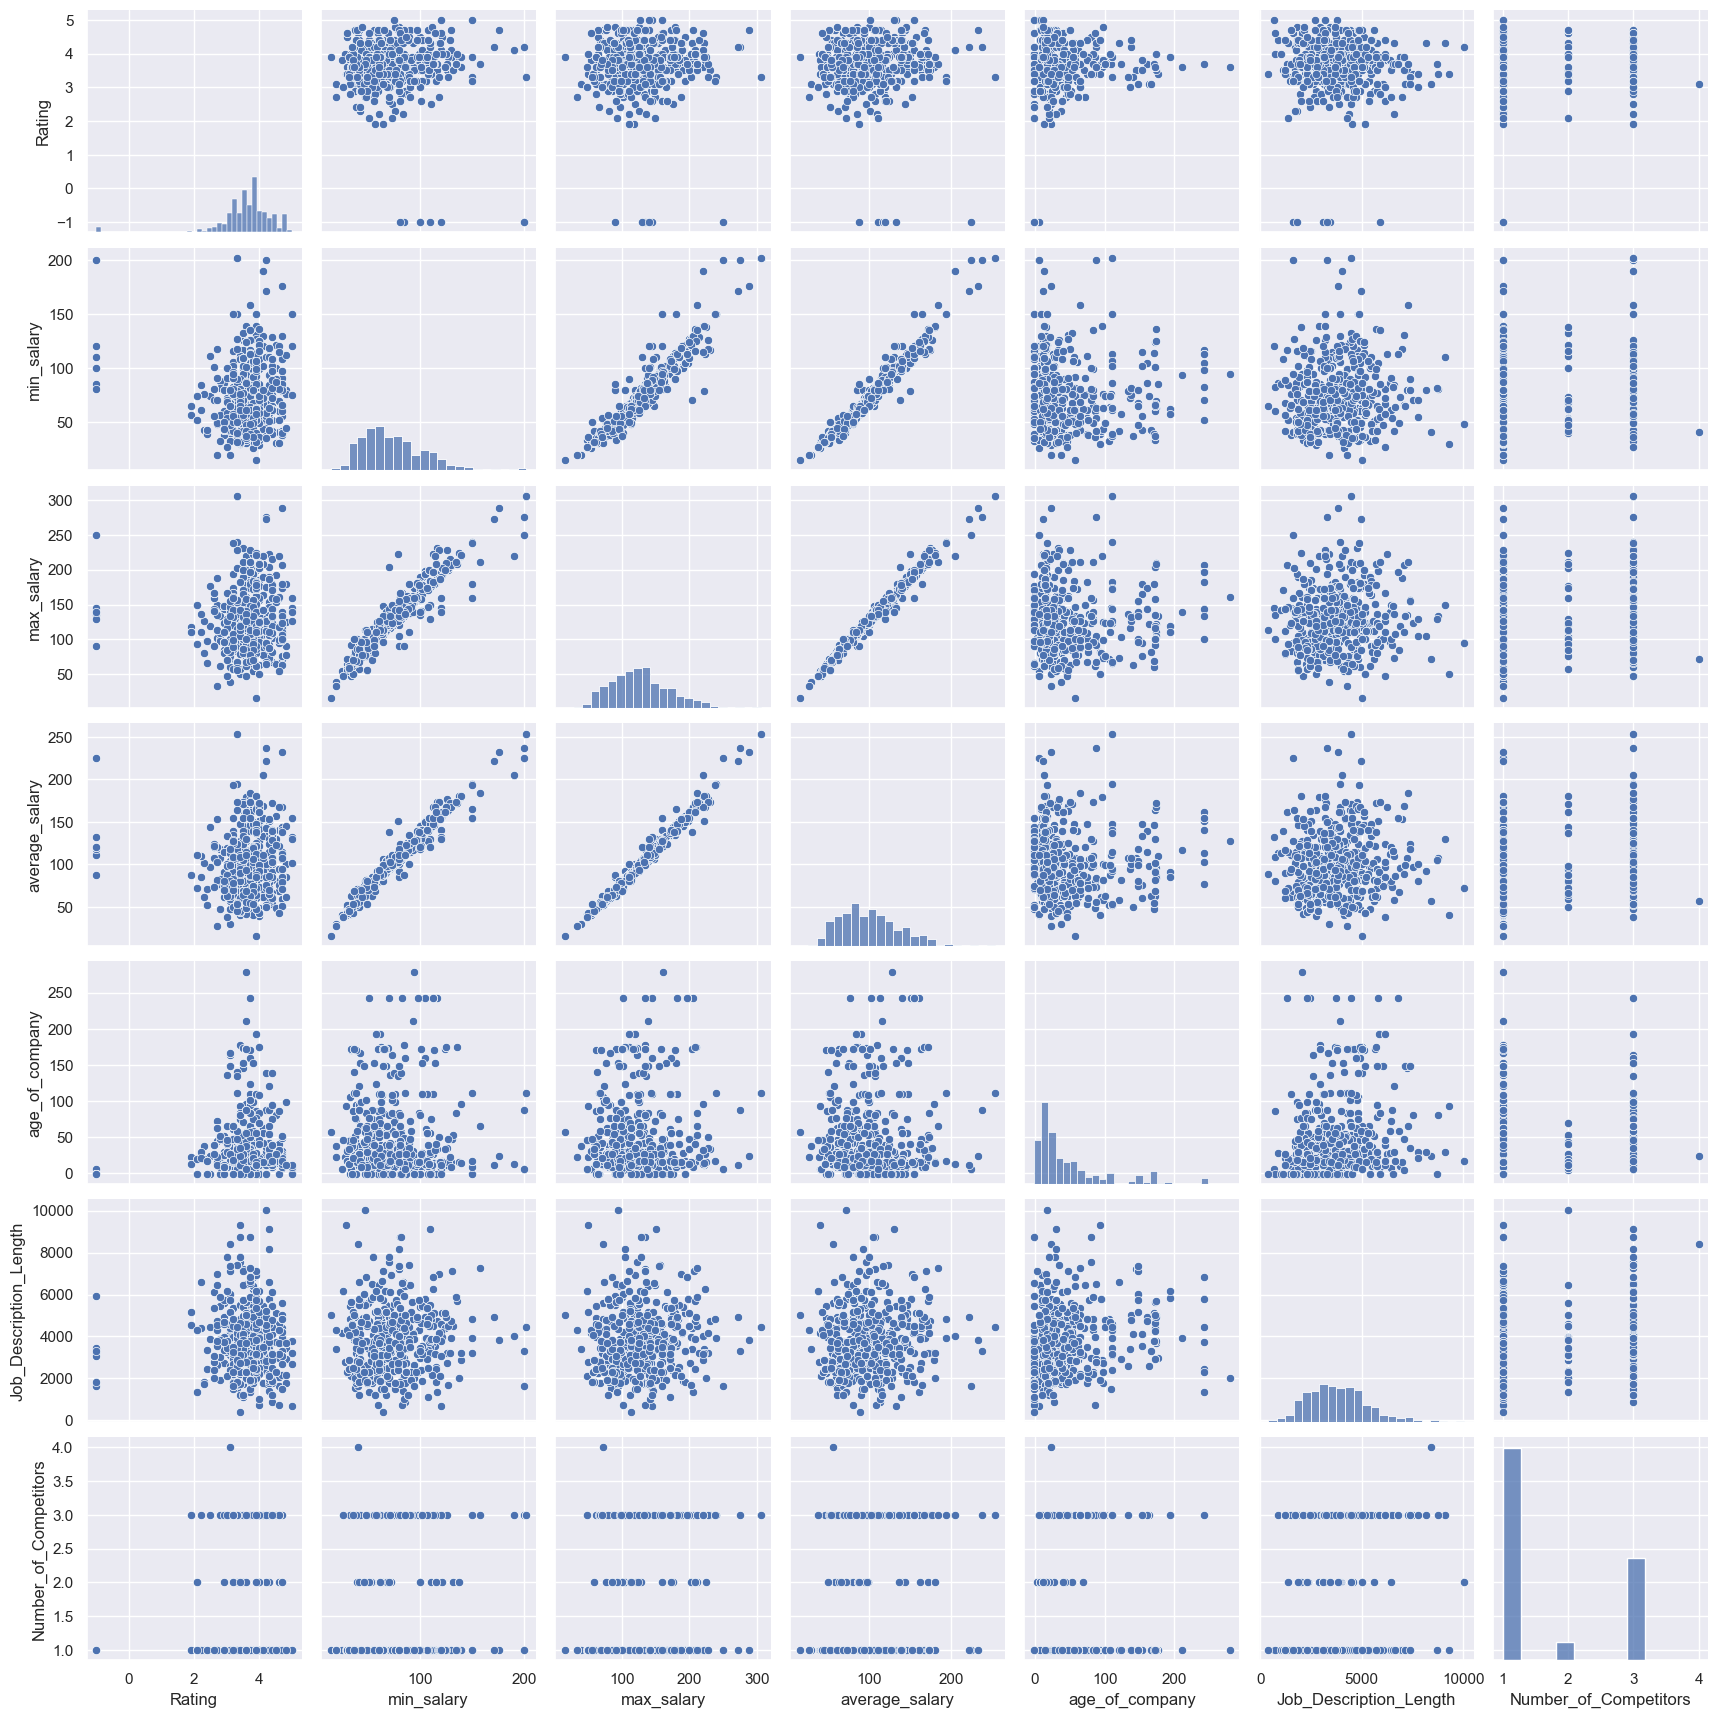

In [25]:
sns.pairplot(df[numerical_columns])

#### Correlation


In [26]:
df[numerical_columns].corr()

,Rating,min_salary,max_salary,average_salary,age_of_company,Job_Description_Length,Number_of_Competitors
Rating,1.000000,-0.009573,0.027344,0.012517,0.026164,-0.012281,0.021395
min_salary,-0.009573,1.000000,0.940136,0.978714,0.002640,0.060420,0.069964
max_salary,0.027344,0.940136,1.000000,0.990066,0.034421,0.075634,0.081629
average_salary,0.012517,0.978714,0.990066,1.000000,0.021817,0.070474,0.078022
age_of_company,0.026164,0.002640,0.034421,0.021817,1.000000,0.164730,0.139800
Job_Description_Length,-0.012281,0.060420,0.075634,0.070474,0.164730,1.000000,0.109321
Number_of_Competitors,0.021395,0.069964,0.081629,0.078022,0.139800,0.109321,1.000000


<Axes: >

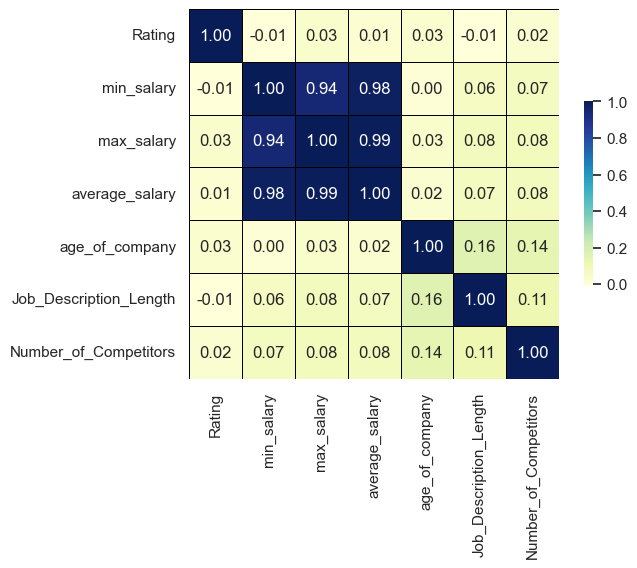

In [27]:
sns.heatmap(df[numerical_columns].corr(), annot = True, linewidths = 0.5, linecolor = 'black', fmt = '.2f', cmap = 'YlGnBu', cbar = True, square = True, cbar_kws= {'shrink': .5})

## EDA - Categorical Variables

In [28]:
categorical_columns

['Job_Title_Simplified',
 'Location',
 'Headquarter',
 'Size',
 'Type_of_ownership',
 'Industry',
 'Sector',
 'Revenue',
 'Job_state',
 'spark',
 'R-studio',
 'Python',
 'Excel',
 'AWS',
 'Seniority_Level']

<Axes: xlabel='Job Title', ylabel='Count'>

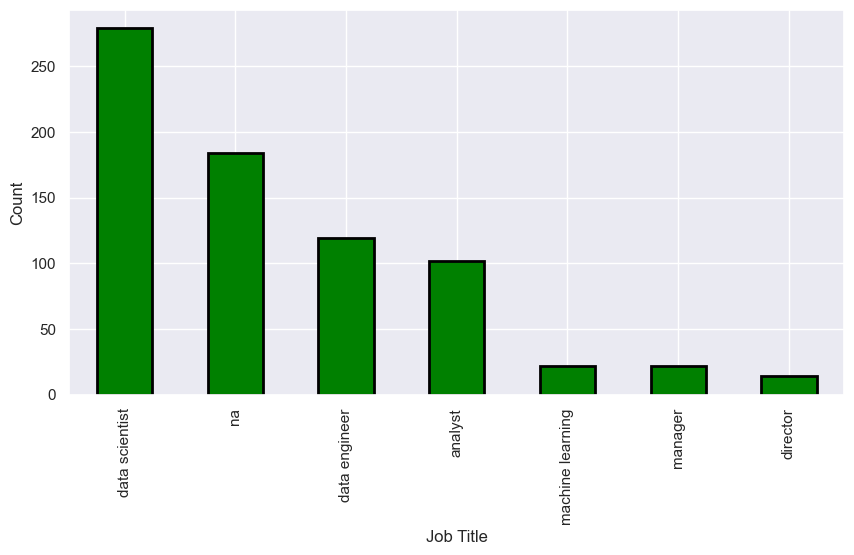

In [29]:
df['Job_Title_Simplified'].value_counts().plot.bar( color = 'green', edgecolor = 'black', linewidth = 2, width = 0.5, figsize = (10,5), xlabel = 'Job Title', ylabel = 'Count', grid = True)

<Axes: xlabel='Seniority', ylabel='Count'>

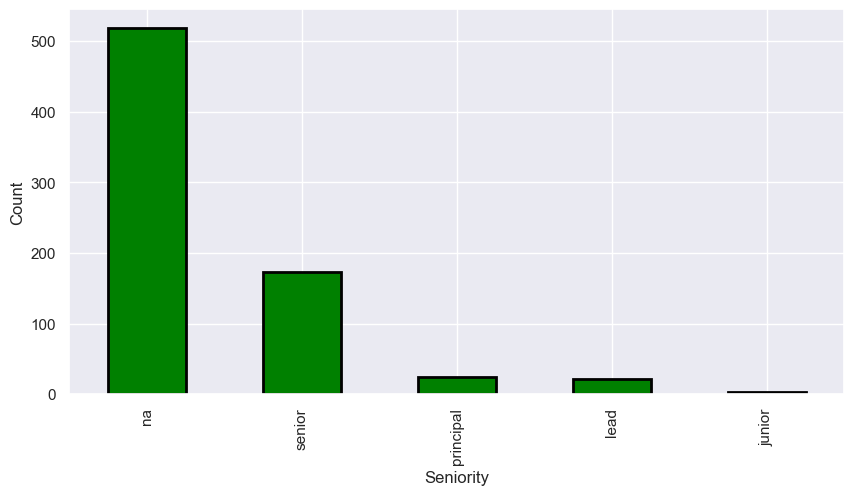

In [30]:
df['Seniority_Level'].value_counts().plot.bar( color = 'green', edgecolor = 'black', linewidth = 2, width = 0.5, figsize = (10,5), xlabel = 'Seniority', ylabel = 'Count', grid = True)

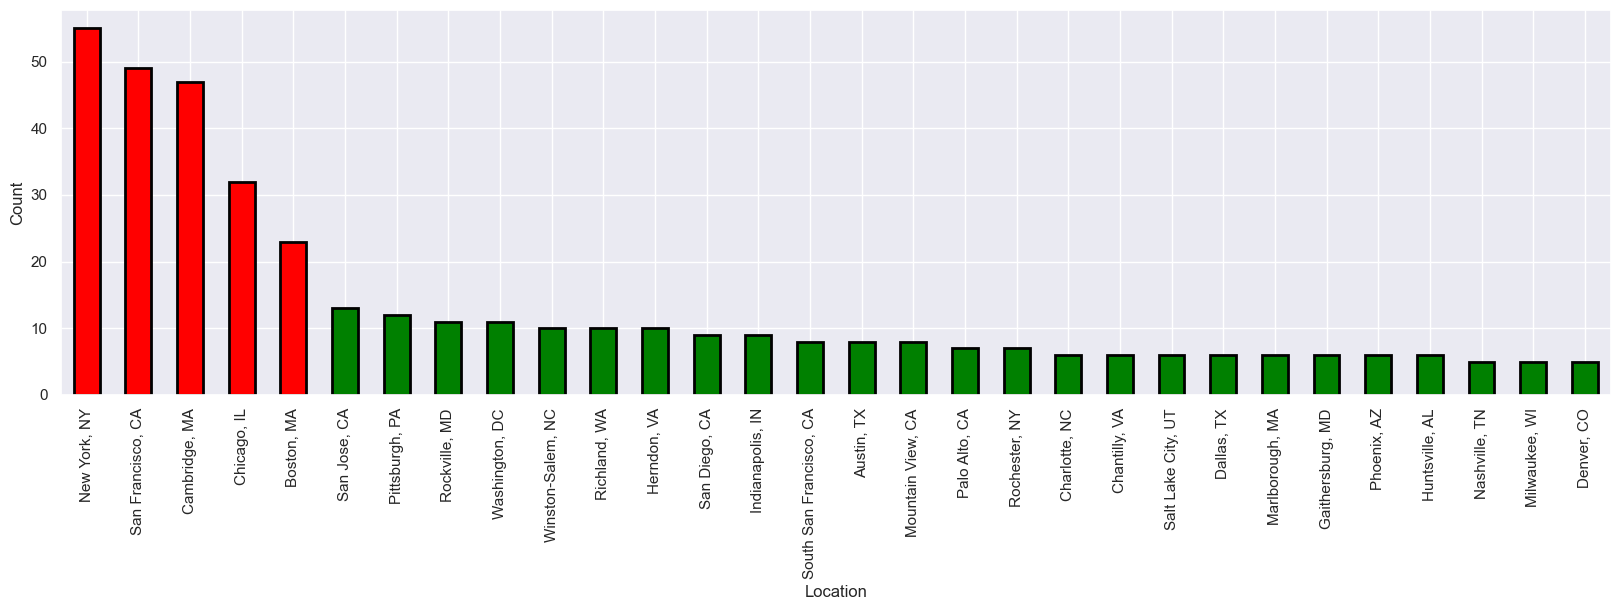

In [31]:
df['Location'].value_counts().head(30).plot.bar( color = 'green', edgecolor = 'black', linewidth = 2, width = 0.5, figsize = (20,5), xlabel = 'Location', ylabel = 'Count', grid = True)

# Color the top 5 with red
for patch in plt.gca().patches[:5]:
    patch.set_facecolor('red')

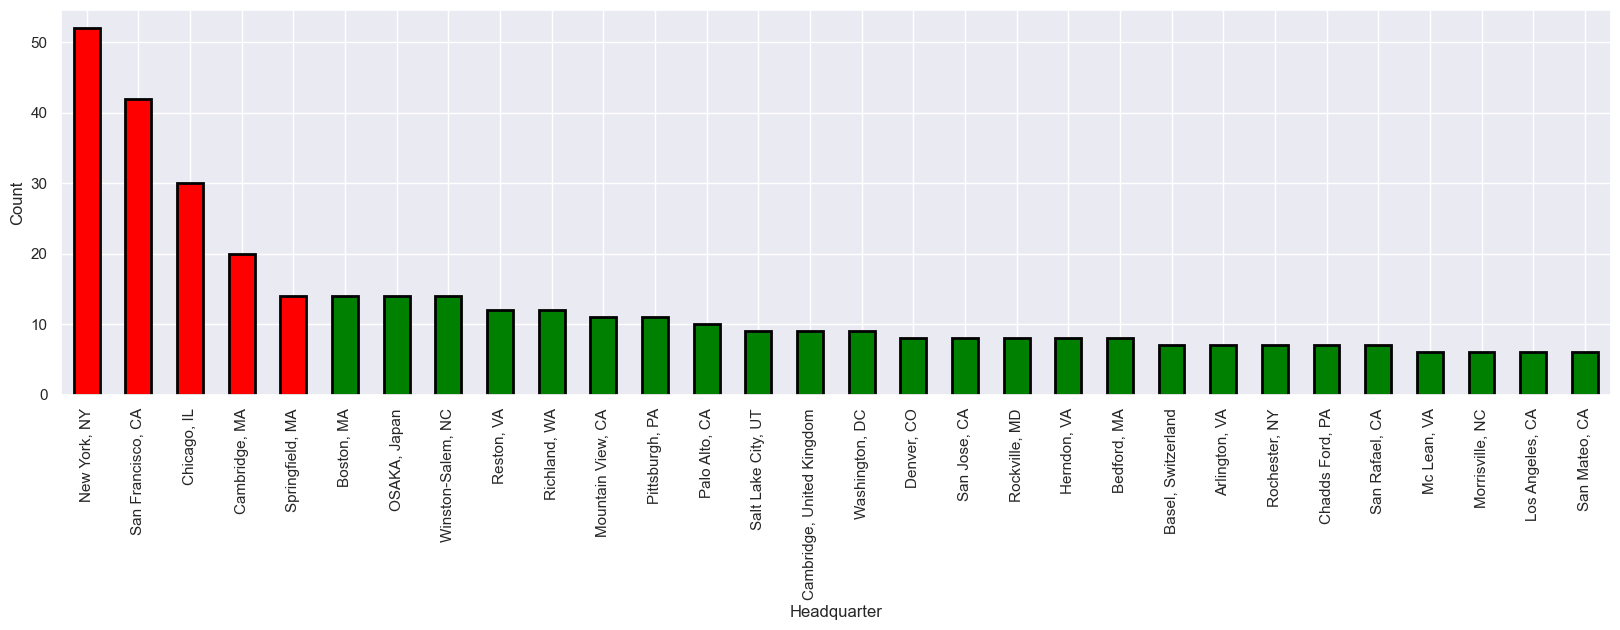

In [32]:
df['Headquarter'].value_counts().head(30).plot.bar( color = 'green', edgecolor = 'black', linewidth = 2, width = 0.5, figsize = (20,5), xlabel = 'Headquarter', ylabel = 'Count', grid = True)

# Color the top 5 with red
for patch in plt.gca().patches[:5]:
    patch.set_facecolor('red')

<Axes: xlabel='Size', ylabel='Count'>

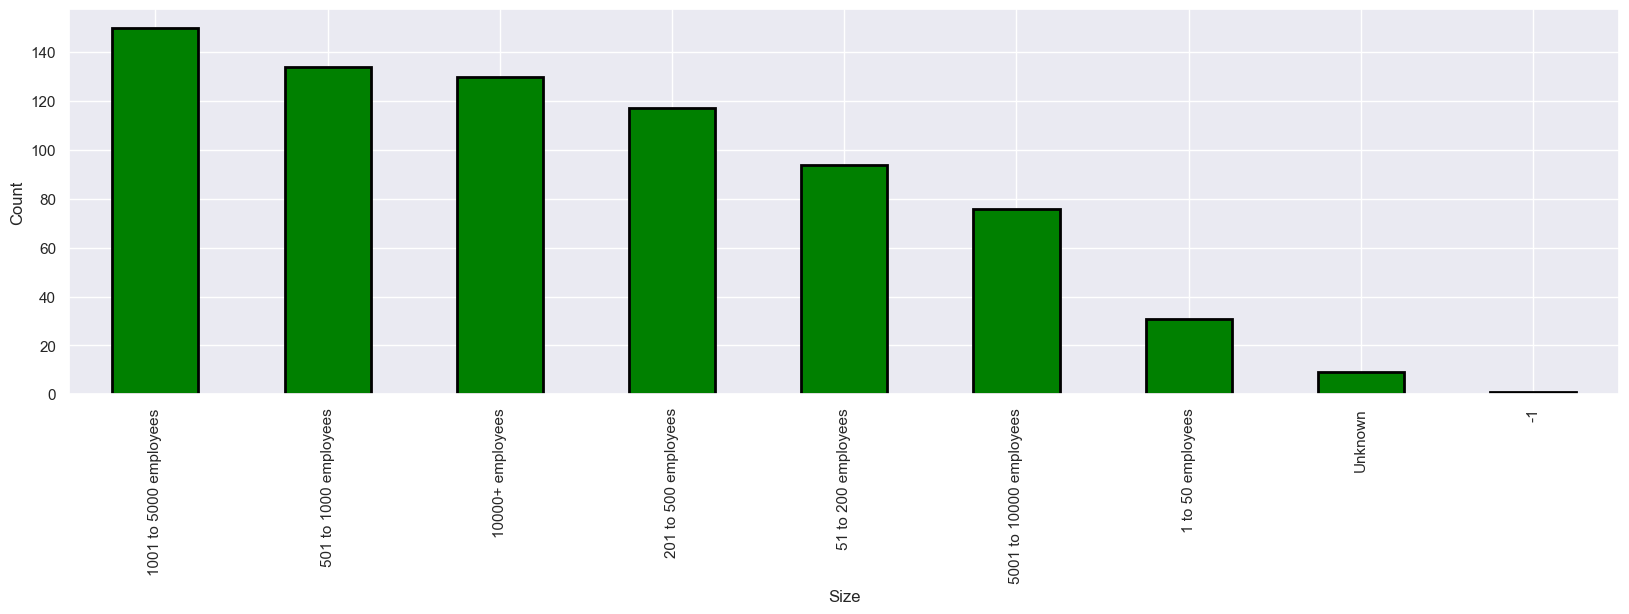

In [33]:
df['Size'].value_counts().head(30).plot.bar( color = 'green', edgecolor = 'black', linewidth = 2, width = 0.5, figsize = (20,5), xlabel = 'Size', ylabel = 'Count', grid = True)


<Axes: xlabel='Type Of Ownership', ylabel='Count'>

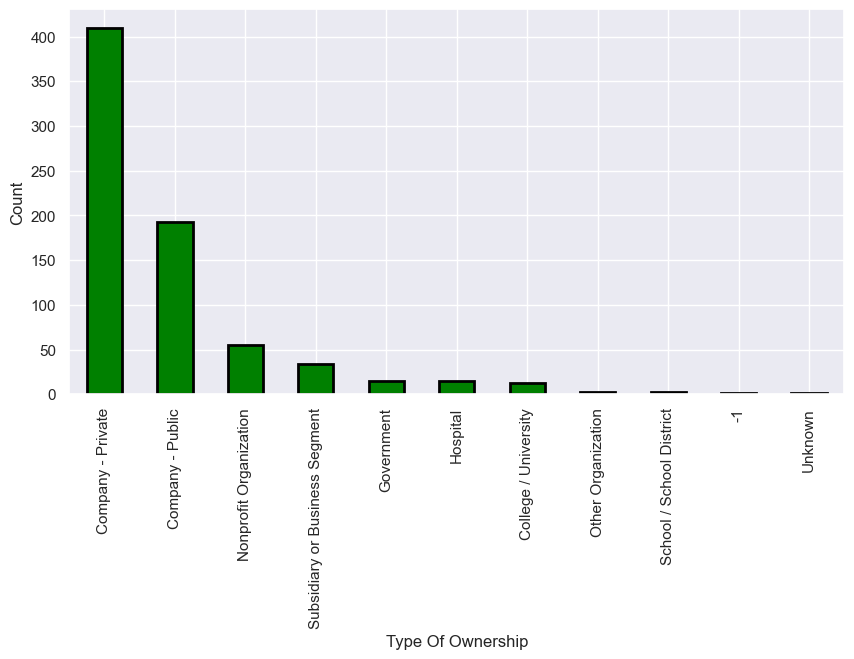

In [34]:
df['Type_of_ownership'].value_counts().plot.bar( color = 'green', edgecolor = 'black', linewidth = 2, width = 0.5, figsize = (10,5), xlabel = 'Type Of Ownership', ylabel = 'Count', grid = True)

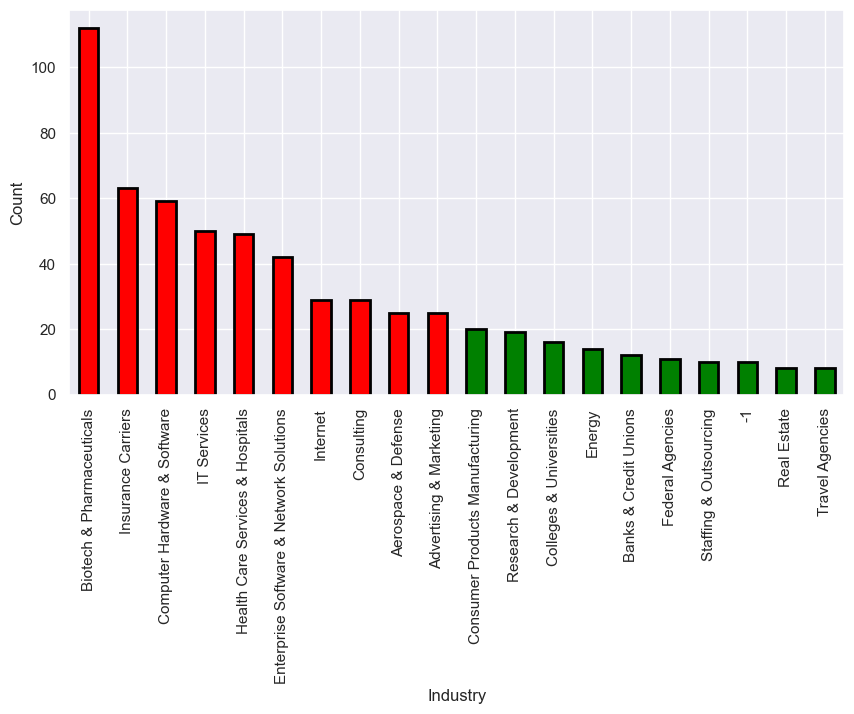

In [35]:
df['Industry'].value_counts().head(20).plot.bar( color = 'green', edgecolor = 'black', linewidth = 2, width = 0.5, figsize = (10,5), xlabel = 'Industry', ylabel = 'Count', grid = True)

# Color the top 10 with red
for patch in plt.gca().patches[:10]:
    patch.set_facecolor('red')

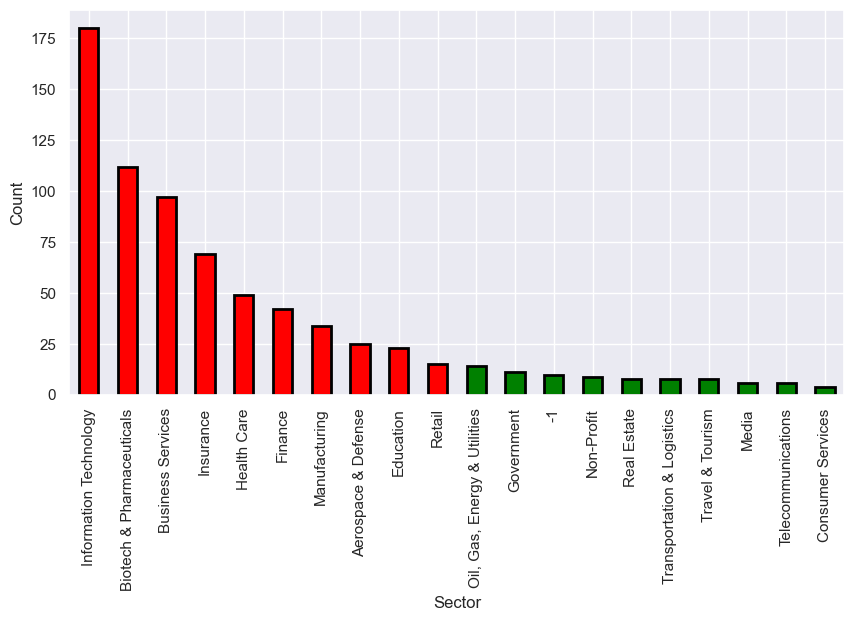

In [36]:
df['Sector'].value_counts().head(20).plot.bar( color = 'green', edgecolor = 'black', linewidth = 2, width = 0.5, figsize = (10,5), xlabel = 'Sector', ylabel = 'Count', grid = True)


# Color the top 10 with red
for patch in plt.gca().patches[:10]:
    patch.set_facecolor('red')

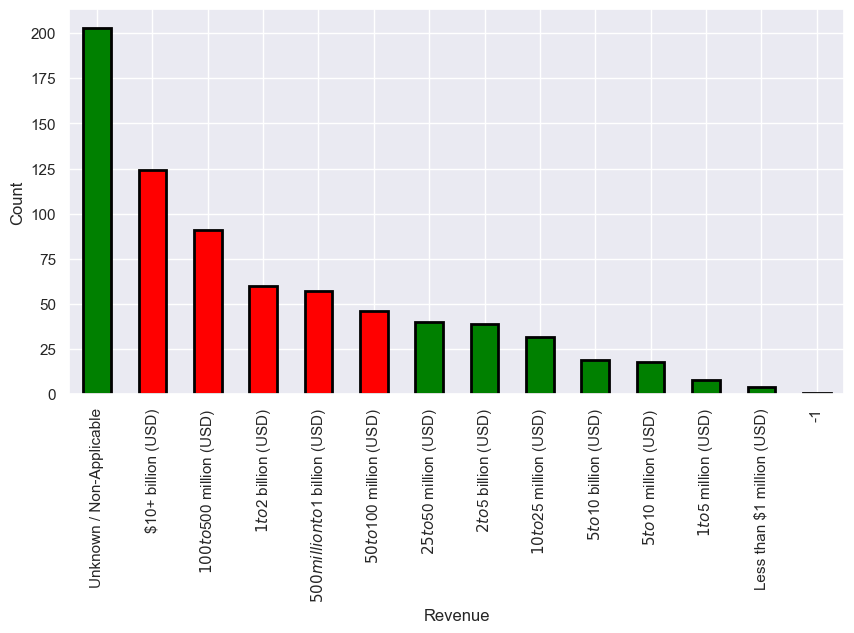

In [37]:
df['Revenue'].value_counts().head(20).plot.bar( color = 'green', edgecolor = 'black', linewidth = 2, width = 0.5, figsize = (10,5), xlabel = 'Revenue', ylabel = 'Count', grid = True)


# Color the top 5 with red
for patch in plt.gca().patches[1:6]:
    patch.set_facecolor('red')

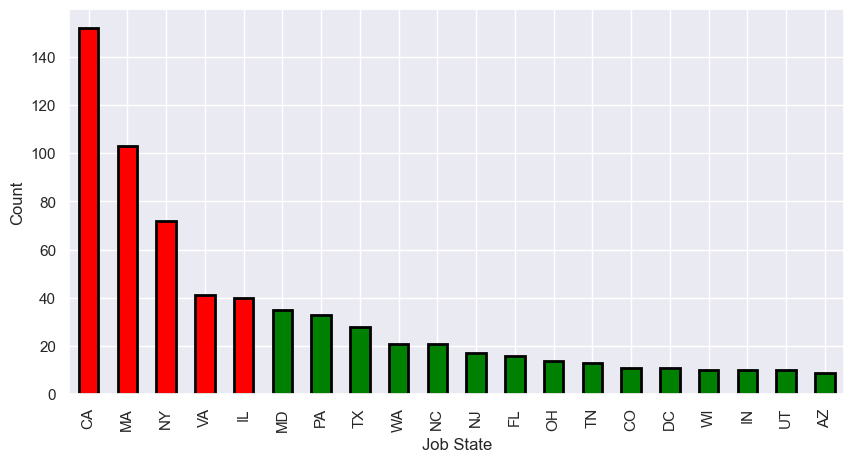

In [38]:
df['Job_state'].value_counts().head(20).plot.bar( color = 'green', edgecolor = 'black', linewidth = 2, width = 0.5, figsize = (10,5), xlabel = 'Job State', ylabel = 'Count', grid = True)


# Color the top 5 with red
for patch in plt.gca().patches[:5]:
    patch.set_facecolor('red')

<Axes: xlabel='AWS', ylabel='Count'>

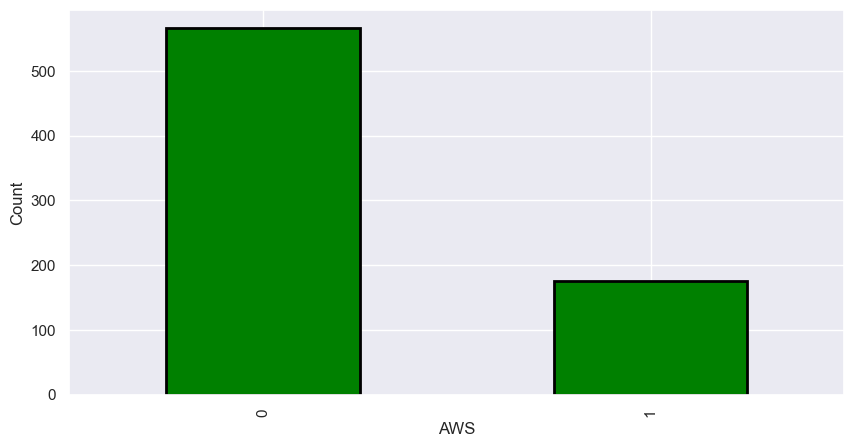

In [39]:
df['AWS'].value_counts().plot.bar(color = 'green', edgecolor = 'black', linewidth = 2, width = 0.5, figsize = (10,5), xlabel = 'AWS', ylabel = 'Count', grid = True)

<Axes: xlabel='python', ylabel='Count'>

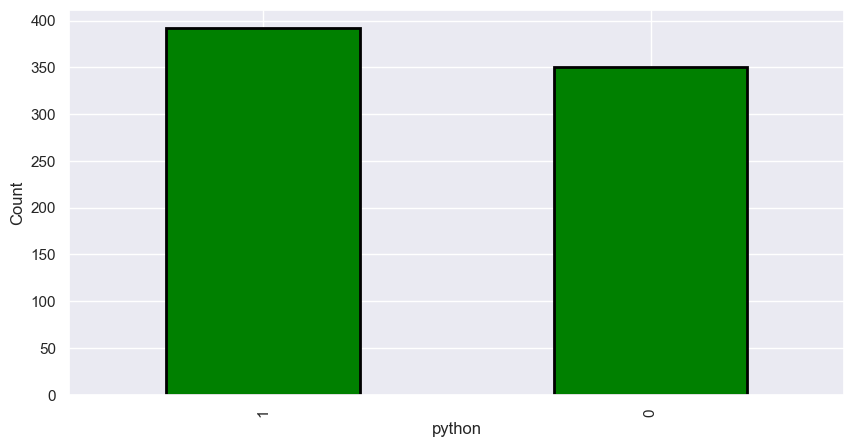

In [40]:
df['Python'].value_counts().plot.bar(color = 'green', edgecolor = 'black', linewidth = 2, width = 0.5, figsize = (10,5), xlabel = 'python', ylabel = 'Count', grid = True)

<Axes: xlabel='R-studio', ylabel='Count'>

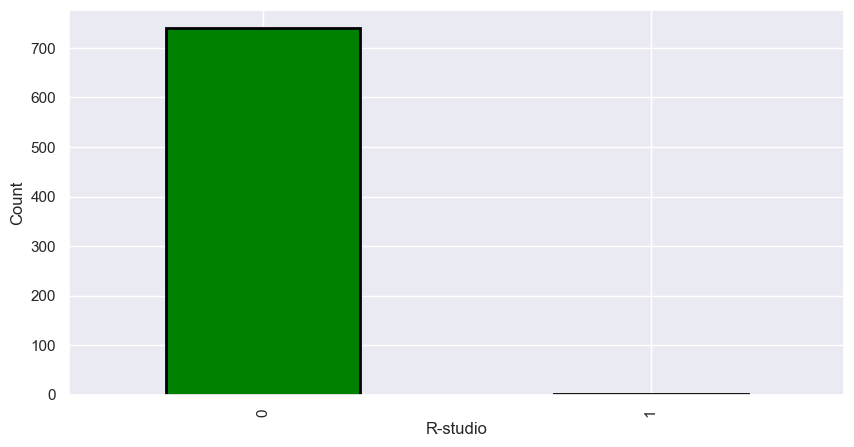

In [41]:
df['R-studio'].value_counts().plot.bar(color = 'green', edgecolor = 'black', linewidth = 2, width = 0.5, figsize = (10,5), xlabel = 'R-studio', ylabel = 'Count', grid = True)

<Axes: xlabel='spark', ylabel='Count'>

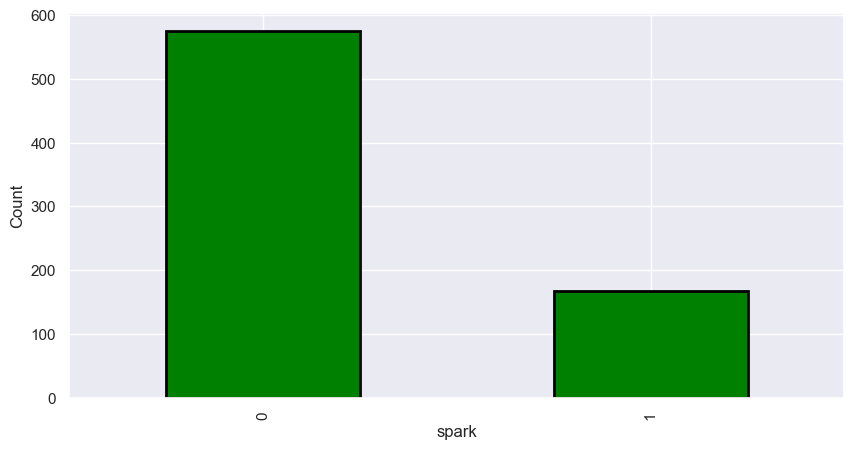

In [42]:
df['spark'].value_counts().plot.bar(color = 'green', edgecolor = 'black', linewidth = 2, width = 0.5, figsize = (10,5), xlabel = 'spark', ylabel = 'Count', grid = True)

<Axes: xlabel='Excel', ylabel='Count'>

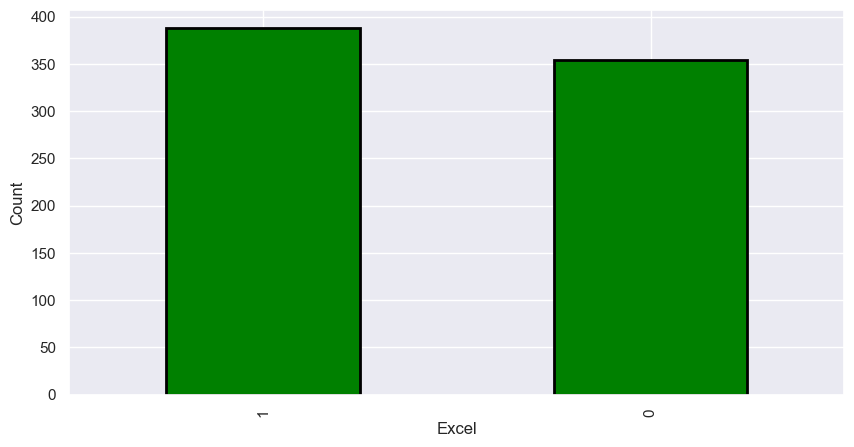

In [43]:
df['Excel'].value_counts().plot.bar(color = 'green', edgecolor = 'black', linewidth = 2, width = 0.5, figsize = (10,5), xlabel = 'Excel', ylabel = 'Count', grid = True)

#### Numerical Vs. Categorical Variables

In [44]:
pd.pivot_table(df, index = 'Job_Title_Simplified', values = 'average_salary')

,average_salary
Job_Title_Simplified,
analyst,66.122549
data engineer,105.403361
data scientist,117.564516
director,168.607143
machine learning,126.431818
manager,84.022727
na,87.967391


<Axes: xlabel='Job Title', ylabel='Count'>

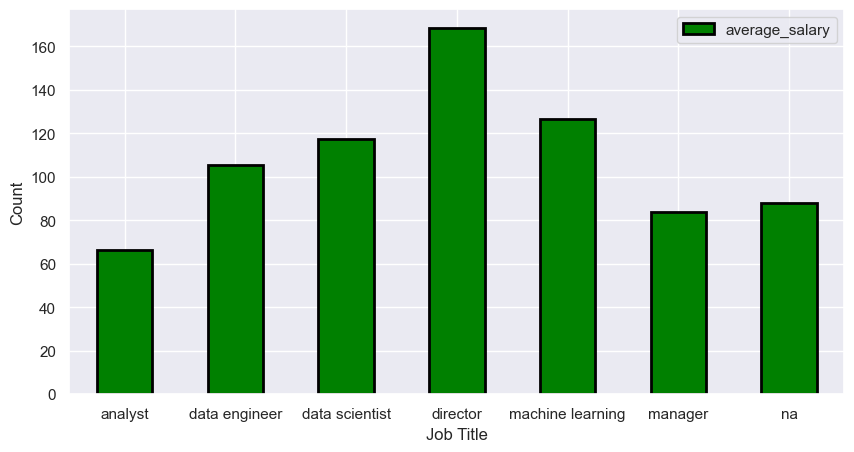

In [45]:
pd.pivot_table(df, index = 'Job_Title_Simplified', values = 'average_salary').plot.bar(color = 'green', edgecolor = 'black', linewidth = 2, width = 0.5, figsize = (10,5), xlabel = 'Job Title', ylabel = 'Count', grid = True, rot = 0)

In [46]:
pd.pivot_table(df, index = ['Job_Title_Simplified', 'Seniority_Level'], values = 'average_salary')

average_salary
Job_Title_Simplified Seniority_Level                
analyst              junior                53.250000
                     lead                  64.666667
                     na                    61.308219
                     senior                82.020833
data engineer        lead                 161.142857
                     na                    96.701220
                     principal            162.500000
                     senior               114.586207
data scientist       junior               106.500000
                     lead                 158.300000
                     na                   107.043011
                     principal            175.300000
                     senior               131.222222
director             na                   168.607143
machine learning     na                   119.133333
                     principal            232.500000
                     senior               127.000000
manager              na                    84.022727
na                   lead                 110.000000
                     na                    78.500000
                     principal            105.192308
                     senior               110.214286

In [47]:
pd.pivot_table(df, index = ['Job_state','Job_Title_Simplified'], values = 'average_salary', aggfunc = 'count', margins = True, margins_name = 'All').sort_values('average_salary', ascending = False).head(30)

average_salary
Job_state Job_Title_Simplified                
All                                        742
CA        data scientist                    68
MA        na                                46
NY        data scientist                    40
MA        data scientist                    30
CA        na                                27
          data engineer                     25
VA        data scientist                    18
CA        analyst                           18
WA        data scientist                    17
MD        na                                16
IL        data scientist                    15
NY        analyst                           14
TX        data scientist                    13
MD        data scientist                    13
NC        na                                12
NY        na                                12
MA        data engineer                     12
VA        data engineer                     10
TN        data engineer                     10
CA        manager                            9
PA        analyst                            8
IL        data engineer                      8
PA        na                                 8
TX        data engineer                      8
FL        data scientist                     7
TX        na                                 7
PA        machine learning                   7
OH        data scientist                     7
IL        director                           6

In [48]:
pd.pivot_table(df[df.Job_Title_Simplified == 'data scientist'], index = ['Job_state'], values = 'average_salary').sort_values('average_salary', ascending = False)

,average_salary
Job_state,
DC,149.000000
CA,142.522059
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000


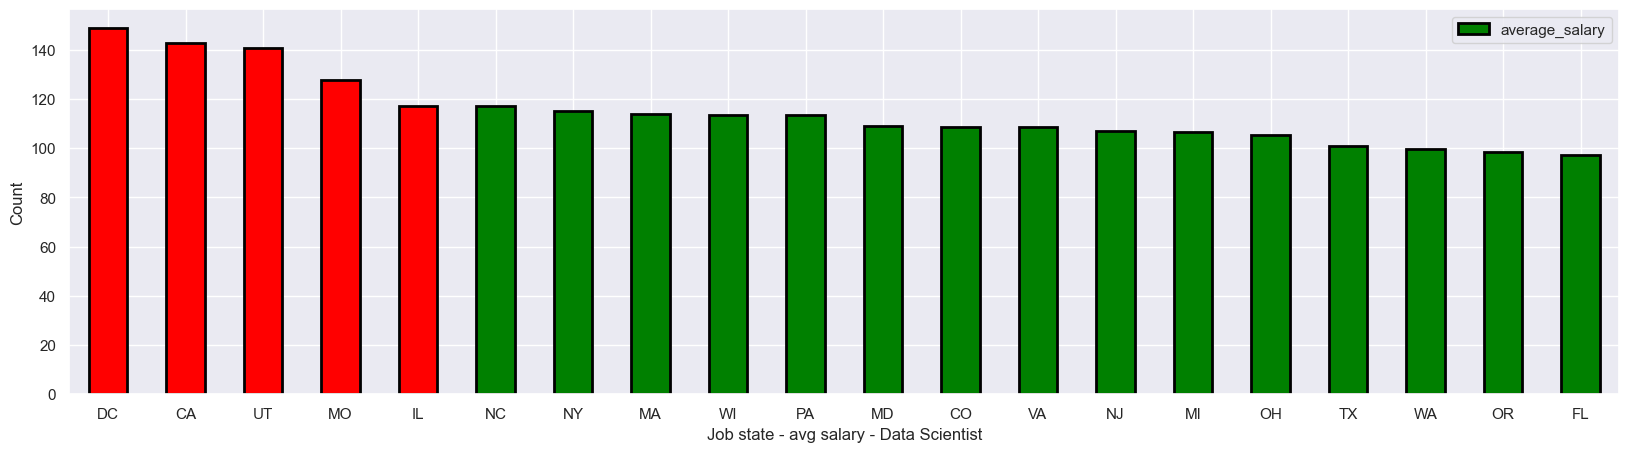

In [49]:
pd.pivot_table(df[df.Job_Title_Simplified == 'data scientist'], index = ['Job_state'], values = 'average_salary').sort_values('average_salary', ascending = False).head(20).plot.bar(color = 'green', edgecolor = 'black', linewidth = 2, width = 0.5, figsize = (20,5), xlabel = 'Job state - avg salary - Data Scientist', ylabel = 'Count', grid = True, rot = 0)

# Color the top 5 with red
for patch in plt.gca().patches[:5]:
    patch.set_facecolor('red')

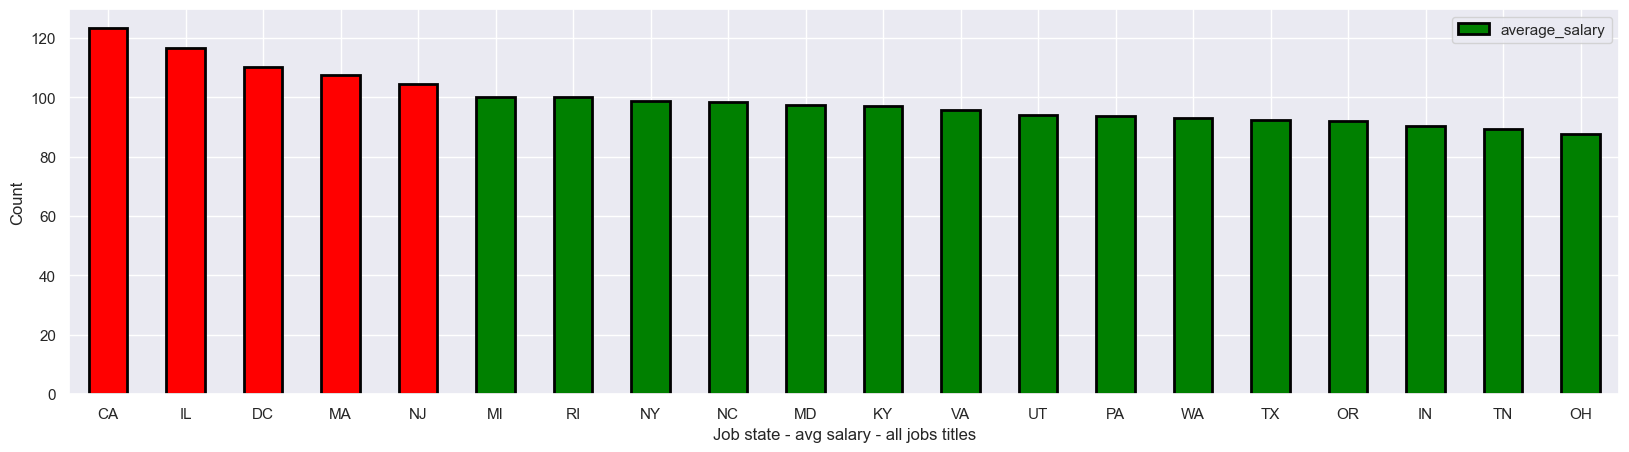

In [50]:
pd.pivot_table(df, index = ['Job_state'], values = 'average_salary').sort_values('average_salary', ascending = False).head(20).plot.bar(color = 'green', edgecolor = 'black', linewidth = 2, width = 0.5, figsize = (20,5), xlabel = 'Job state - avg salary - all jobs titles', ylabel = 'Count', grid = True, rot = 0)

# Color the top 5 with red
for patch in plt.gca().patches[:5]:
    patch.set_facecolor('red')

In [51]:
pd.pivot_table(df, index = ['Job_state','Job_Title_Simplified'], values = 'average_salary').sort_values('average_salary', ascending = False).head(20)

,,average_salary
Job_state,Job_Title_Simplified,
IL,director,221.750000
CA,machine learning,177.300000
NJ,director,161.500000
DC,data scientist,149.000000
CA,data scientist,142.522059
UT,data scientist,140.500000
IL,machine learning,133.000000
CA,data engineer,129.540000
MO,data scientist,127.666667


In [52]:
categorical_columns

['Job_Title_Simplified',
 'Location',
 'Headquarter',
 'Size',
 'Type_of_ownership',
 'Industry',
 'Sector',
 'Revenue',
 'Job_state',
 'spark',
 'R-studio',
 'Python',
 'Excel',
 'AWS',
 'Seniority_Level']

In [53]:
for i in categorical_columns:
    print(pd.pivot_table(df, index = i, values = 'average_salary', sort=True).sort_values('average_salary', ascending = False).head(5))

                      average_salary
Job_Title_Simplified                
director                  168.607143
machine learning          126.431818
data scientist            117.564516
data engineer             105.403361
na                         87.967391
                   average_salary
Location                         
Bellevue, WA             184.5000
Lake Forest, IL          179.5000
Mountain View, CA        177.1875
Novato, CA               168.0000
Burbank, CA              164.0000
                   average_salary
Headquarter                      
Fremont, CA            225.000000
Lake Forest, IL        179.500000
Burbank, CA            164.000000
Mill Valley, CA        162.000000
Mountain View, CA      158.818182
                     average_salary
Size                               
Unknown                  128.111111
-1                       117.500000
10000+ employees         112.769231
51 to 200 employees      111.744681
1 to 50 employees        104.870968
             

In [54]:
# Revenue of company vs python

pd.pivot_table(df, index = 'Revenue', columns = 'Python', values = 'average_salary', aggfunc = 'count').sort_values(1, ascending = False)

Python,0,1
Revenue,,
Unknown / Non-Applicable,93,110
$10+ billion (USD),66,58
$1 to $2 billion (USD),16,44
$100 to $500 million (USD),47,44
$500 million to $1 billion (USD),29,28
$50 to $100 million (USD),21,25
$2 to $5 billion (USD),17,22
$10 to $25 million (USD),16,16
$25 to $50 million (USD),24,16


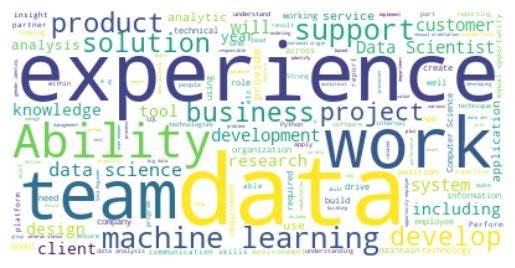

In [61]:
# implement code to generate wordcloud for Job_description
import wordcloud
from wordcloud import WordCloud, STOPWORDS

text = " ".join(i for i in df.Job_Description)
#stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

----------------------

---------------